# 实验2: 共享单车租用影响因素分析
## 实验数据：Kaggle网站(Bike Sharing Demand | Kaggle)
## 时间尺度: 2011-01-01 00:00:00至2012-12-19 23:00:00
## 数据含义: 该数据集文件格式为csv格式，该数据集包括了租车日期，租车季节，租车气温，租车空气湿度等数据。该数据集的具体数据特征描述如下：
> - datetime - 日期+时间
> - season - 1=春天；2=夏天；3=秋天；4=冬天
> - holiday - 是否是节假日
> - workingday - 1=工作日;0=周末;
> - weather 
>> - 1：晴天，多云
>> - 2：雾天，阴天
>> - 3：小雪，小雨
>> - 4：大雨，大雪，大雾
> temp - 气温摄氏度
> atemp - 体感温度
> humidity - 湿度
> windspeed - 风速
> casual - 非注册用户个数
> registered - 注册用户个数
> count - 给定日期时间（每小时）总租车人数
> 实验目标：分析影响共享单车的租用情况的因素，包括但不限于(1)天气,(2)温度,(3)时间,(4)风速。

## 实验目标：分析影响共享单车的租用情况的因素，包括但不限于(1)天气,(2)温度,(3)时间,(4)风速。

---
# -------------------------------------以下是具体实验内容-----------------------------------------
---


#  导入库 ，本实验用到了numpy、pandas用于数据处理，matplotlib用于数据可视化显示以及对影响因素的直观显示

# 中文文字默认设置为宋体的格式

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'''显示中文'''
matplotlib.rc("font", family='YouYuan')

# 导入文件 数据文件用pandas被保存为DataFrame的格式 同时保留出列名


In [60]:
data_address = "./实验数据/共享单车租用影响因素分析/share bike.csv"
# 以只读模式打开一个CSV文件
data = pd.read_csv(data_address)
columns_name = data.columns

# 浅浅看一下数据的结构 
## 可以看到数据的组成与上述所说一致，开始进行下一步操作

## 通过对文件分析以及网页查找，发现此文件只包含每个月前20天的数据，这个在后续分析过程中应当注意！！！

In [61]:
data.describe()
data[0:21*24:24]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
24,2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
72,2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,2
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3
120,2011-01-06 06:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,36,36
144,2011-01-07 07:00:00,1,0,1,1,8.20,10.605,69,8.9981,8,76,84
168,2011-01-08 07:00:00,1,0,0,2,6.56,9.090,74,7.0015,1,8,9
192,2011-01-09 07:00:00,1,0,0,1,3.28,4.545,53,12.9980,1,5,6
216,2011-01-10 07:00:00,1,0,1,1,4.92,6.060,50,15.0013,2,75,77


# 函数，查找函数

In [62]:
'''查找算法'''


def data_find(data_data, num):
    oooo = 0
    for i in range(0, len(data_data)):
        if data_data[i] == num:
            oooo = 1
            return i
    if (oooo == 0):
        return -1

# 对数据预处理
# 部分定义部分变量，以及部分数据操作，进行第一波粗略数据分析

In [63]:
# 注册用户与非注册用户的占比
casual_num = 0
registered_num = 0

# 节假日与非节假日平均骑车人数
holiday_num = 0
holiday_times = 0
unholiday_num = 0
unholiday_times = 0

# 工作日与非工作日
working_num = 0
working_times = 0
unworking_num = 0
unworking_times = 0
# 天气
weather_num = [0, 0, 0, 0]

for i in range(0, len(data)):
    casual_num += data['casual'].loc[i]
    registered_num += data['registered'].loc[i]
    if data['holiday'].loc[i] == 1:
        holiday_num += data['count'].loc[i]
        holiday_times += 1
    else:
        unholiday_num += data['count'].loc[i]
        unholiday_times += 1
    if data['workingday'].loc[i] == 1:
        working_num += data['count'].loc[i]
        working_times += 1
    else:
        unworking_num += data['count'].loc[i]
        unworking_times += 1
    weather_num[data['weather'].loc[i] - 1] += 1

# 注册用户与非注册用户之间的数量差距
## 从饼状图直观地看出来，注册用户在所有的用户中是占绝大多数的，高达81.2%，而非注册专用户占比较少，原因是共享单车大部分用户还是学生以及上班族，有着固定的使用需求，少部分未注册用户可能是作为应急需要等其他原因，当然还有可能是注册用户有优惠等原因导致如此比例。

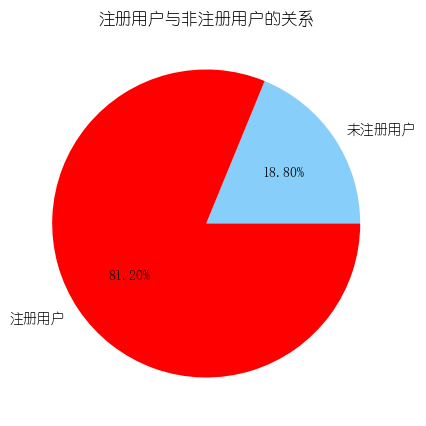

In [64]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(1, 1, 1)
# ax1注册用户和非注册用户的图片
ax1.pie([casual_num, registered_num], labels=['未注册用户', '注册用户'], autopct='%.2f%%', colors=['lightskyblue', 'red'])
ax1.set_title('注册用户与非注册用户的关系')
plt.show()

# 节假日与非节假日之间的数量关系

## 这里有两个图 左侧图为节假日与非节假日平均骑行数量饼图，右侧为节假日与非节假总骑行数量，两个图代表的含义不同

### 左侧图显示出不管节假日与否，每日的平均骑行数量其实相差无几
### 右侧图显示出节假日总的每日骑行数量远大于非节假日的每日骑行数量
### 原因其实也很简单，节假日的数量远远小于非节假日的数量，而每天的平均数量接近，总数量自然而然会产生较大的数量差异，这与显示也较为符合。

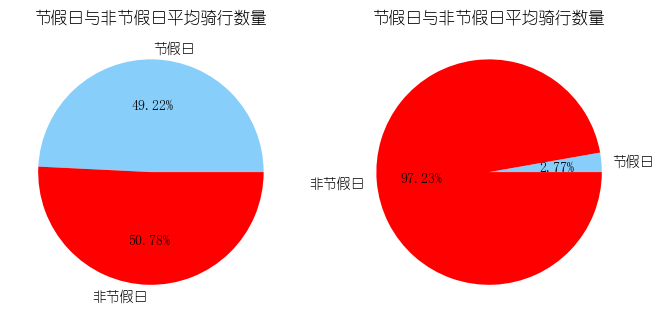

In [65]:
fig = plt.figure(figsize=(8, 5))
ax2 = fig.add_subplot(1, 2, 1)
ax3 = fig.add_subplot(1, 2, 2)
# 节假日与非节假日数量关系
ax2.pie([holiday_num * 24 / holiday_times, unholiday_num * 24 / unholiday_times], labels=['节假日', '非节假日'],
        autopct='%.2f%%', colors=['lightskyblue', 'red'])
ax2.set_title('节假日与非节假日平均骑行数量')

ax3.pie([holiday_num * 24, unholiday_num * 24], labels=['节假日', '非节假日'],
        autopct='%.2f%%', colors=['lightskyblue', 'red'])
ax3.set_title('节假日与非节假日平均骑行数量')
plt.show()

# 工作日与非工作日之间的数量关系

## 这里有两个图 左侧图为工作日与非工作日平均骑行数量饼图，右侧为工作日与非工作日总骑行数量，两个图代表的含义不同

### 右侧图显示出不管工作日与否，每日的平均骑行数量其实相差无几
### 左侧图显示出工作日总的每日骑行数量远大于非节假日的每日骑行数量
### 原因其实和节假日与非节日之间的关系如出一辙。

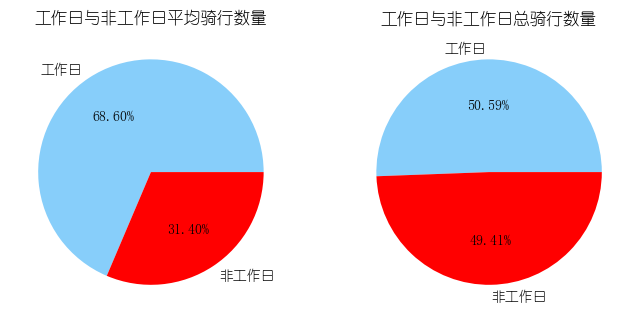

In [66]:
fig = plt.figure(figsize=(8, 5))
ax2 = fig.add_subplot(1, 2, 1)
ax3 = fig.add_subplot(1, 2, 2)

# 工作日与非工作日数量关系
ax2.pie([working_num, unworking_num], labels=['工作日', '非工作日'],
        autopct='%.2f%%', colors=['lightskyblue', 'red'])
ax2.set_title('工作日与非工作日平均骑行数量')

ax3.pie([working_num / working_times, unworking_num / unworking_times], labels=['工作日', '非工作日'],
        autopct='%.2f%%', colors=['lightskyblue', 'red'])
ax3.set_title('工作日与非工作日总骑行数量')
plt.show()

# 数据中不同天气数量的占比

## 图像清晰的说明了此数据一共两年的时间里，各种天气比例的差异。
### '晴天，多云'占了大多数,
### '雾天，阴天'次之,
### '小雪，小雨'较少
###  '大雨，大雪，大雾'几乎没有。
## 提前了解这个图像方便对后续数据处理的理解

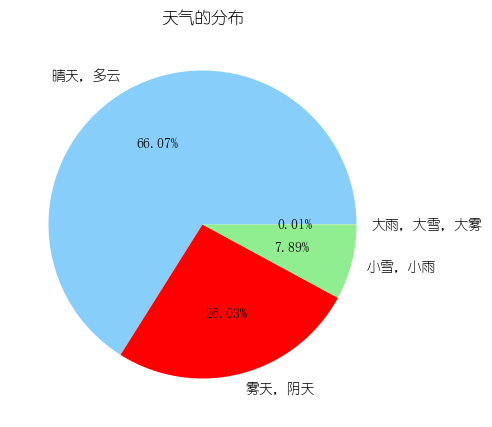

In [67]:
fig = plt.figure(figsize=(8, 5))
ax2 = fig.add_subplot(1, 1, 1)

# 天气
ax2.pie(weather_num, labels=['晴天，多云', '雾天，阴天', '小雪，小雨', '大雨，大雪，大雾'],
        autopct='%.2f%%', colors=['lightskyblue', 'red','lightgreen','yellow'])
ax2.set_title('天气的分布')
plt.show()

# 温度和体感温度直接的关系

## 代码主要遍历data文件的'temp'、'atemp'数据，然后通过一些处理，在通过折线图表达出来 ，纵坐标为温度，横坐标为日期，天数为单位。


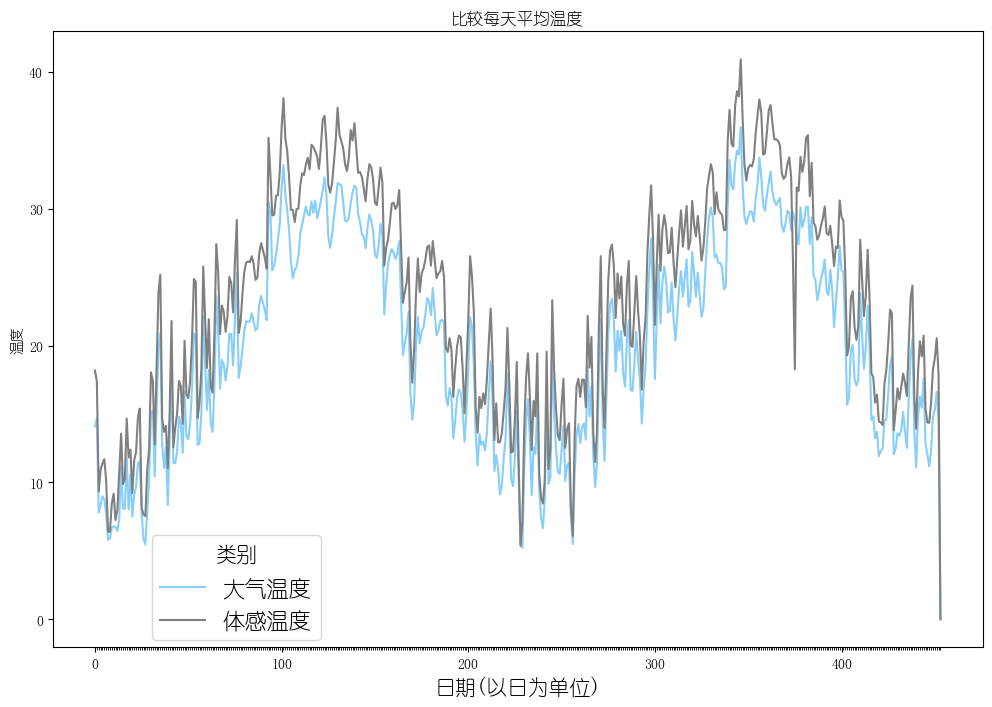

In [68]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(1, 1, 1)

data_time_ = pd.to_datetime(data['datetime'])
# 温度#体感温度
temp_data = pd.DataFrame(columns=['temp'])
atemp_data = pd.DataFrame(columns=['atemp'])
time_ = 0
time_lines = 0
temp_24hour = []
atemp_24hour = []


def average(list_data):
    all = 0
    all_times = 0
    for i in list_data:
        all += i
        all_times += 1
    return all / all_times


import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
for i in range(0, len(data)):

    if time_ == 0:
        temp_data.loc[time_lines] = [0]
        atemp_data.loc[time_lines] = [0]
    temp_24hour.append(data['temp'][i])
    atemp_24hour.append(data['atemp'][i])

    time_ += 1
    if time_ == 24:
        time_ = 0
        temp_data.loc[time_lines] = [average(temp_24hour)]
        atemp_data.loc[time_lines] = [average(atemp_24hour)]
        time_lines += 1
        temp_24hour.clear()
        atemp_24hour.clear()

xtick = np.arange(len(temp_data))
rects1 = ax1.plot(temp_data['temp'],label='大气温度', color='lightskyblue')
rects2 = ax1.plot(atemp_data['atemp'], label='体感温度', color='gray')

ax1.set_title("比较每天平均温度")
ax1.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(0.3, 0.2))
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# 设置 X轴刻度

ax1.set_xticks(xtick, minor=True)
# 设置 X轴刻度标签
ax1.set_xlabel('日期(以日为单位)', fontsize=15)
# Y 轴
ax1.yaxis.set_tick_params(which="both", labelsize=10)
ax1.set_ylabel('温度')

plt.show()

# 此折线图充分的展现出大气温度和体感温度的关系

## 结论：
### 在大多数情况下，体感温度大于大气温度。
###  一年的温度按照夏天高冬天低的趋势呈现规律的图像。


## 但体感温度是否收到其它因素的影响，如风速、日照等因素的音响时，还需要进一步分析。

## 因此在后续对温度进行分析时，可以只考虑大气温度对骑行数量的影响 
## 
---

# 以下对各因素的具体分析
---

# 天气的影响

## 代码用到了data文件的'weather'、'count'、'casual'、'egistered'数据，通过柱状图展示出来，并通过不同的颜色来表明注册用户与非注册用户的数量。

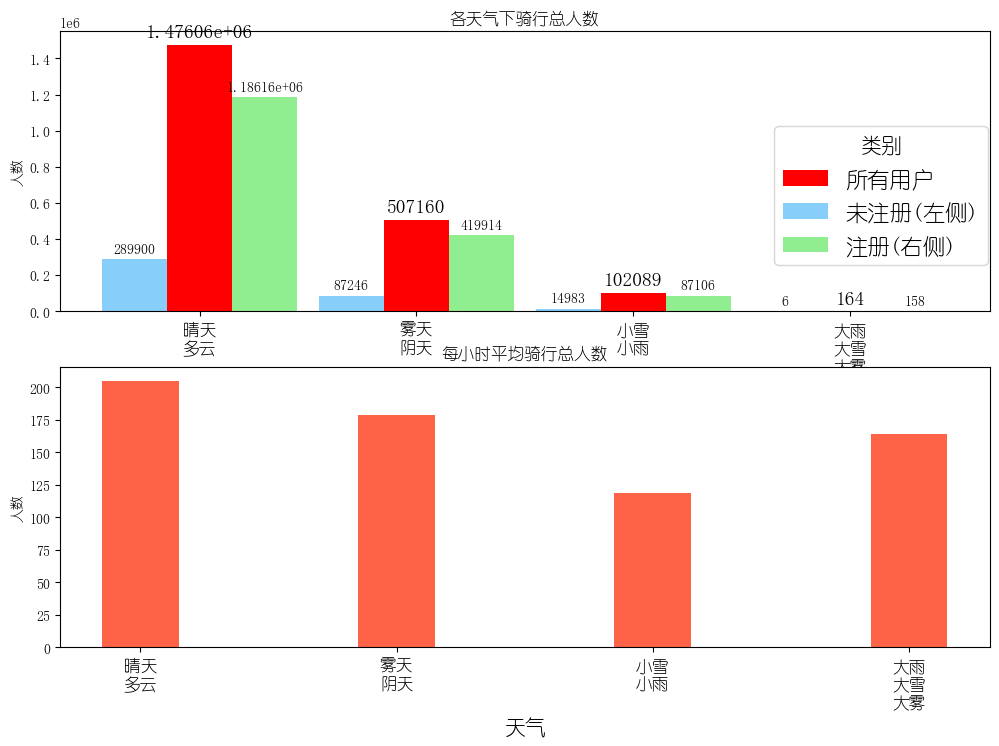

In [69]:
#   天气的影响
average_weather_data = pd.DataFrame(columns=['weather', 'num', 'count', 'casual', 'registered'])
average_weather_lines = 0
for i in range(0, len(data)):

    index = data_find(average_weather_data['weather'], data['weather'][i])
    if index == -1:
        average_weather_data.loc[average_weather_lines] = [data['weather'][i], 1, data['count'][i], data['casual'][i],
                                                           data['registered'][i]]
        average_weather_lines += 1
    else:
        average_weather_data.loc[index] = [data['weather'][i], average_weather_data['num'].loc[index] + 1,
                                           data['count'][i] + average_weather_data['count'].loc[index],
                                           data['casual'][i] + average_weather_data['casual'].loc[index],
                                           data['registered'][i] + average_weather_data['registered'].loc[index]]

average_weather_data.sort_values(by='weather', axis=0, ascending=True, inplace=True)
weather = ['晴天\n多云', '雾天\n阴天', '小雪\n小雨', '大雨\n大雪\n大雾']
weather_data = pd.DataFrame(columns=['weather', 'num', 'count', 'casual', 'registered'])
for i in range(0, 4):
    weather_data.loc[weather[i]] = [average_weather_data['weather'][i], average_weather_data['num'][i],
                                    average_weather_data['count'][i], average_weather_data['casual'][i],
                                    average_weather_data['registered'][i]]
fig = plt.figure(figsize=(12, 8))
# 创建一个子图，然后在子图上操作
ax1 = fig.add_subplot(2, 1, 1)
customers_index = np.arange(len(weather))
width = 0.3
rects1 = ax1.bar(customers_index, weather_data['count'], width=width, align='center', color='red',
                 label='所有用户')
rects2 = ax1.bar(customers_index - width, weather_data['casual'], width=width, align='center', color='lightskyblue',
                 label='未注册(左侧)')
rects3 = ax1.bar(customers_index + width, weather_data['registered'], width=width, align='center', color='lightgreen',
                 label='注册(右侧)')
ax1.bar_label(rects1, padding=3, **{'fontsize': 14})
ax1.bar_label(rects2, padding=3)
ax1.bar_label(rects3, padding=3)
ax1.xaxis.set_ticks_position('bottom')
# 刻度线只显示在 y 轴 右侧。
ax1.yaxis.set_ticks_position('left')
# 显示label 里面设置的图例
ax1.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(1.01, 0.7))
# 设置 X轴刻度
ax1.set_xticks(customers_index)
# 设置 X轴刻度标签
ax1.set_xticklabels(weather)
# 设置 X 轴标签，字体大小
ax1.xaxis.set_tick_params(labelsize=12)
# 设置 X轴标签
ax1.set_xlabel('天气', fontsize=15)
# Y 轴
ax1.yaxis.set_tick_params(which="both", labelsize=10)
ax1.set_ylabel('人数')
ax1.set_title('各天气下骑行总人数')
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(customers_index, weather_data['count'] / weather_data['num'], width=width, align='center', color='tomato',
        label='all')

# 设置 X轴刻度
ax2.set_xticks(customers_index)
# 设置 X轴刻度标签
ax2.set_xticklabels(weather)
ax2.xaxis.set_tick_params(labelsize=12)
# 设置 X轴标签
ax2.set_xlabel('天气', fontsize=15)
# Y 轴
ax2.yaxis.set_tick_params(which="both", labelsize=10)
ax2.set_ylabel('人数')
ax2.set_title('每小时平均骑行总人数')
ax1.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(1.01, 0.7))
plt.show()

# 两个图表示出了各不同天气下的骑行总人数和每小时平均骑行人数

## 上侧的图表明总的骑行人数：
### '晴天，多云'骑行总人数最多,
### '雾天，阴天'较多,
### '小雪，小雨'较少
### '大雨，大雪，大雾'几乎没有。

## 下侧的图表明每小时平均骑行人数：
### '晴天，多云'、'雾天，阴天'、'大雨，大雪，大雾'几乎差不多，
### '小雪，小雨'较少。

# 分析：

## 其实通过前面的饼图也能理解，每小时人数接近，但不同天气数量总量的差距也带来了不同天气骑行数总量差距。

## 对于下图的不同情况，我分析的原因为晴天多云天气良好，人数最多正常； 而雾天和阴天不影响骑行，但因为天气较阴暗会影响部分人出行计划导致有所下降，小雨小雪则可能不方便骑行，或者有条件的直接打车地铁等方式出行，大雨 大雪 大雾天气反差的高，其可能原因为能见度低，公交、骑车等方式受限，而部分人不得不外出，而只能采用共享单车的方式出行，所以人数较多。
---

# 温度的影响
## 代码用到了data文件的'temp'、'count'、'casual'、'egistered'数据，通过散点图、折线图柱状图展示出来，并通过不同的颜色来表明注册用户与非注册用户的数量。

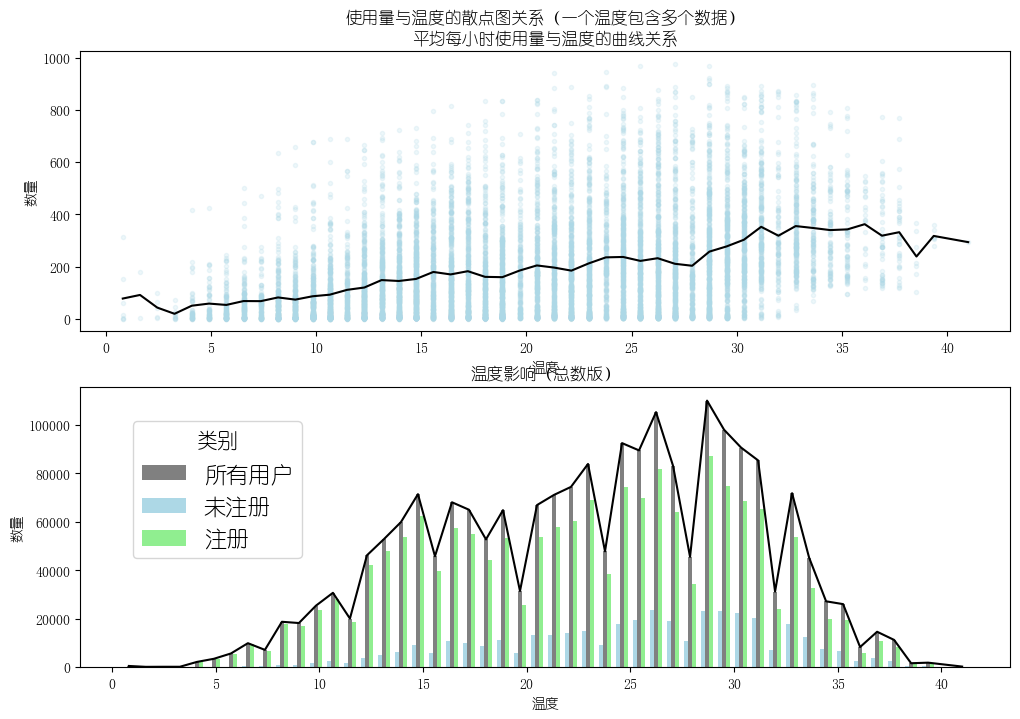

In [70]:
#   温度的影响
# 画出温度和租车人数的散点图以及同温度下租车人数的平均值与温度的曲线图
average_temp_data = pd.DataFrame(columns=['temp', 'num', 'count', 'casual', 'registered'])
average_temp_lines = 0
for i in range(0, len(data)):

    index = data_find(average_temp_data['temp'], data['temp'][i])
    if index == -1:
        average_temp_data.loc[average_temp_lines] = [data['temp'][i], 1, data['count'][i], data['casual'][i],
                                                     data['registered'][i]]
        average_temp_lines += 1
    else:
        average_temp_data.loc[index] = [data['temp'][i], average_temp_data['num'].loc[index] + 1,
                                        data['count'][i] + average_temp_data['count'].loc[index],
                                        data['casual'][i] + average_temp_data['casual'].loc[index],
                                        data['registered'][i] + average_temp_data['registered'].loc[index]]
average_temp_data.sort_values(by='temp', axis=0, ascending=True, inplace=True)

fig = plt.figure(figsize=(12, 8))
# 创建一个子图，然后在子图上操作
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax1
ax1.scatter(data['temp'], data['count'], c="lightblue", marker=".", alpha=0.2)
ax1.set_xlabel('温度')
ax1.set_ylabel('数量')
ax1.plot(average_temp_data['temp'], average_temp_data['count'] / average_temp_data['num'], c="black")
ax1.set_title('使用量与温度的散点图关系（一个温度包含多个数据）\n平均每小时使用量与温度的曲线关系')

# ax2
customers_index = [*average_temp_data['temp']]

customers_index = np.array(customers_index)

width = len(average_temp_data) * 0.008
rects1 = ax2.bar(customers_index, average_temp_data['count'], width=width / 2, color='gray',
                 label='所有用户')
rects2 = ax2.bar(customers_index - width / 2, average_temp_data['casual'], width=width / 2, color='lightblue',
                 label='未注册')
rects3 = ax2.bar(customers_index + width / 2, average_temp_data['registered'], width=width / 2, color='lightgreen',
                 label='注册')

ax2.xaxis.set_ticks_position('bottom')
# 刻度线只显示在 y 轴 右侧。
ax2.yaxis.set_ticks_position('left')
ax2.plot(average_temp_data['temp'], average_temp_data['count'], c='black')
# 显示label 里面设置的图例
ax2.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(0.25, 0.35))
ax2.set_title('温度影响（总数版）')
ax2.set_xlabel('温度')
ax2.set_ylabel('数量')
plt.show()

# 两个图表现出了温度对骑行人数的影响

## 上侧的图包含散点图和折线图

### 散点图：对每一个小时的人数，分别以温度做x轴，人数作y轴，对所有点在图上显示，根据散点图的特性，越密集，颜色越深的点代表此点得数据密度越大，说明此温度此人数附近的时刻越多。图上也可以看出（例如5摄氏度时，大部分店都在0-100左右，尽管有超过的，但颜色很淡，说明是极少数情况）。

### 折线图：取每个温度的所有点的数量平均值做一个折线图

## 下侧的图包含一个注册未注册以及总数的各温度骑行人数的柱状图，并将顶点用折线连接。

# 分析：

## 通过对上面图片的分析 可以直观地看出：在温度适中的情况下（5-35摄氏度），每个温度下的平均骑行人数与温度成正比例关系；整体上数量随着温度的增加呈现先增加后减小的趋势，在温度30℃到35℃时，达到最大量 。这些情况表明人们更倾向于在温暖的天气里骑共享单车，但是当温度过高时，共享单车的需求量有所减小。第二张图表示每个温度的总骑行人数也基本符合集中分布（15-35摄氏度的数据最多）。
---

# 时间的影响

## 代码用到了data文件的'time'、'count'、'casual'、'egistered'数据，通过柱状图展示出来，并通过不同的颜色来表明注册用户与非注册用户的数量。


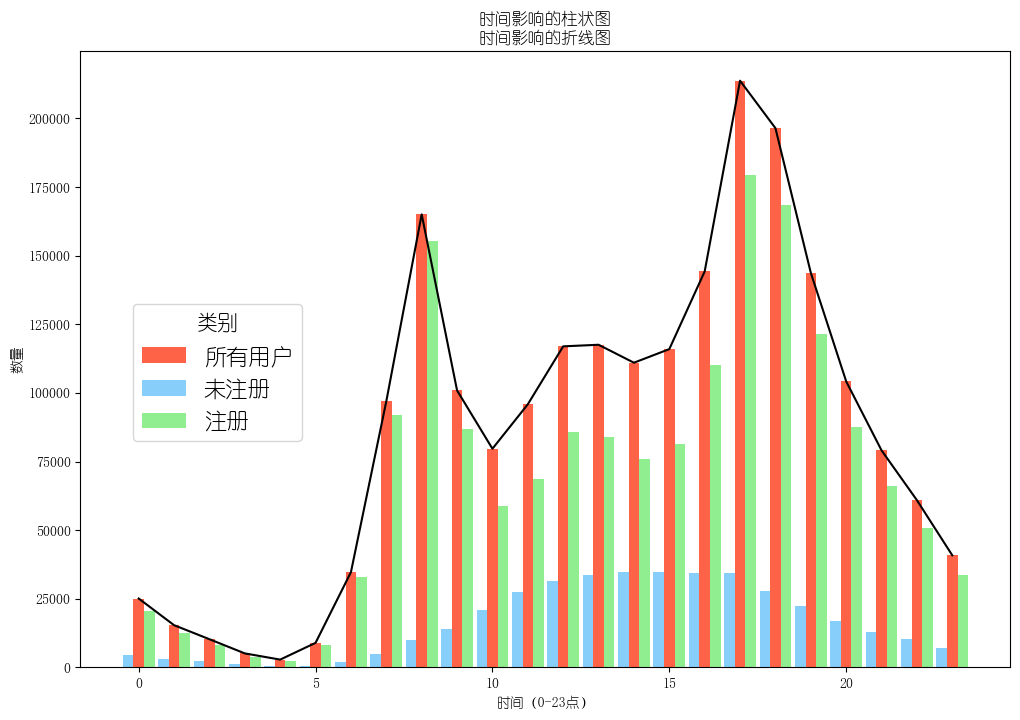

In [71]:
#   时间的影响
average_time_data = pd.DataFrame(columns=['time', 'num', 'count', 'casual', 'registered'])

for i in range(0, 24):
    average_time_data.loc[i] = [i, 0, 0, 0, 0]
for i in range(0, len(data)):
    index = data_find(average_time_data['time'], data_time_[i].hour)
    average_time_data.loc[index] = [average_time_data['time'][index], average_time_data['num'].loc[index] + 1,
                                    data['count'][i] + average_time_data['count'].loc[index],
                                    data['casual'][i] + average_time_data['casual'].loc[index],
                                    data['registered'][i] + average_time_data['registered'].loc[index]]
average_time_data.sort_values(by='time', axis=0, ascending=True, inplace=True)
time = np.array([*average_time_data['time']])
fig = plt.figure(figsize=(12, 8))
# 创建一个子图，然后在子图上操作
ax1 = fig.add_subplot(1, 1, 1)

width = 0.3
rects1 = ax1.bar(time, average_time_data['count'], width=width, color='tomato',
                 label='所有用户')
rects2 = ax1.bar(time - width, average_time_data['casual'], width=width, color='lightskyblue',
                 label='未注册')
rects3 = ax1.bar(time + width, average_time_data['registered'], width=width, color='lightgreen',
                 label='注册')

ax1.xaxis.set_ticks_position('bottom')
# 刻度线只显示在 y 轴 右侧。
ax1.yaxis.set_ticks_position('left')
# 显示label 里面设置的图例
ax1.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(0.25, 0.35))
ax1.set_title('时间影响的柱状图\n时间影响的折线图')
ax1.plot(average_time_data['time'], average_time_data['count'], c='black')
ax1.set_xlabel('时间（0-23点）')
ax1.set_ylabel('数量')
plt.show()

# 此图表现出了不同时间对骑行人数的影响（考虑到每个时间段总数一定，所以只需对平均或总数的一种进行分析即可）


## 此图包含一个注册未注册以及总数的各时间骑行人数的柱状图，并将顶点用折线连接。

# 分析：

## 通过对上面图片的分析 可以直观地看出：

### 高峰期在上午7-9点，下午4-6点(上下班高峰)
### 这也和大多数学生党和上班族的出行时间符合，在通过对注册用户的观察，发现其趋势和总用户趋势相近，也说明了前面对于大多数注册用户是因为上班族和学生党的固定需求。
### 但是反观未注册用户，基本处于一个先上后下的趋势，在下午12点到16点处于顶端。

-----

# 风速的影响


## 代码用到了data文件的'windspeed'、'count'、'casual'、'egistered'数据，通过折线图 柱状图展示出来，并通过不同的颜色来表明注册用户与非注册用户的数量。

## 需要特别注意的是，风速在数据处理的过程中，会发现很多数据的风速为0，需要对此做出预处理，一种方法是拟合然后通过拟合值代替0，由于本实验数据量大，故采用直接删除0风速的数据在进行后续的分析和可视化。

## 对风速的处理过程中，考虑到风速小数点位过多，不利于可视化，故将一段风速（例如2-3）内的数据聚类

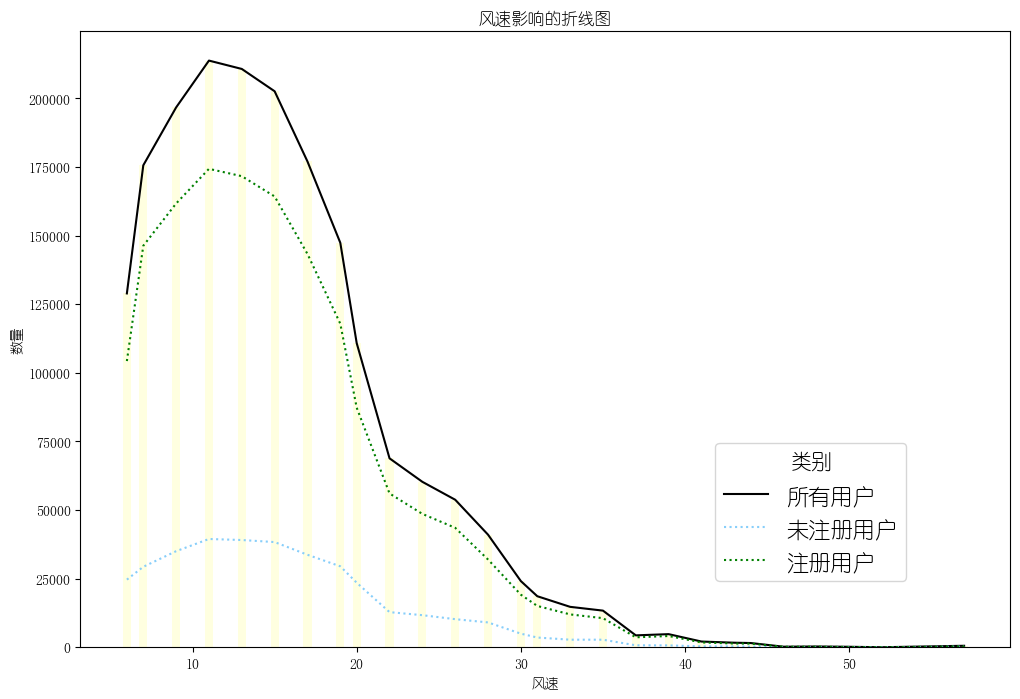

In [72]:
# 风速的影响
average_windspeed_data = pd.DataFrame(columns=['windspeed', 'num', 'count', 'casual', 'registered'])
average_windspeed_lines = 0


def float_int(float_num):  # 四舍五入函数
    if ((int(float_num * 10)) % 10) >= 5:
        return int(float_num) + 1
    else:
        return int(float_num)
wind_loss = 0;#记录缺失
for i in range(0, len(data)):
    if data['windspeed'][i] == 0:
        wind_loss +=1
        continue
    index = data_find(average_windspeed_data['windspeed'], float_int(data['windspeed'][i]))
    if index == -1:
        average_windspeed_data.loc[average_windspeed_lines] = [float_int(data['windspeed'][i]), 1, data['count'][i],
                                                               data['casual'][i],
                                                               data['registered'][i]]
        average_windspeed_lines += 1
    else:
        average_windspeed_data.loc[index] = [float_int(data['windspeed'][i]),
                                             average_windspeed_data['num'].loc[index] + 1,
                                             data['count'][i] + average_windspeed_data['count'].loc[index],
                                             data['casual'][i] + average_windspeed_data['casual'].loc[index],
                                             data['registered'][i] + average_windspeed_data['registered'].loc[index]]
average_windspeed_data.sort_values(by='windspeed', axis=0, ascending=True, inplace=True)

wind = np.array([*average_windspeed_data['windspeed']])
fig = plt.figure(figsize=(12, 8))
# 创建一个子图，然后在子图上操作
ax1 = fig.add_subplot(1, 1, 1)

k = ax1.bar(wind, average_windspeed_data['count'], width=0.5, color='lightyellow')

rects1 = ax1.plot(average_windspeed_data['windspeed'], average_windspeed_data['count'], c='black', label='所有用户')
rects2 = ax1.plot(average_windspeed_data['windspeed'], average_windspeed_data['casual'], color='lightskyblue',
                  label='未注册用户',linestyle = 'dotted')
rects3 = ax1.plot(average_windspeed_data['windspeed'], average_windspeed_data['registered'], c='green', label='注册用户',
                  linestyle = 'dotted')
ax1.xaxis.set_ticks_position('bottom')
# 刻度线只显示在 y 轴 右侧。
ax1.yaxis.set_ticks_position('left')
# 显示label 里面设置的图例
ax1.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(0.9, 0.35))
ax1.set_title('风速影响的折线图')
ax1.set_xlabel('风速')
ax1.set_ylabel('数量')
plt.show()

# 此图表现出了不同风速对骑行人数的影响

## 此图包含一个各风速骑行人数的柱状图，并将顶点用折线连接，另外还画出注册和未注册人数的折线图。

# 分析：

## 通过对上面图片的分析 可以直观地看出：

### 整个图像呈现一个先上后下的趋势，在风速在13左右时达到顶峰
### 注册用户与非注册用户 的趋势与总人数的趋势也接近一致，说明风速的大小对注册和非注册用户的影响差距不大。
### 风速过大的情况较少，所以风速主要集中在0-30之间。

-----

# 季节的影响

## 代码用到了data文件的'season'、'count'、'casual'、'egistered'数据，通过柱状图展示出来，并通过不同的颜色来表明注册用户与非注册用户的数量。



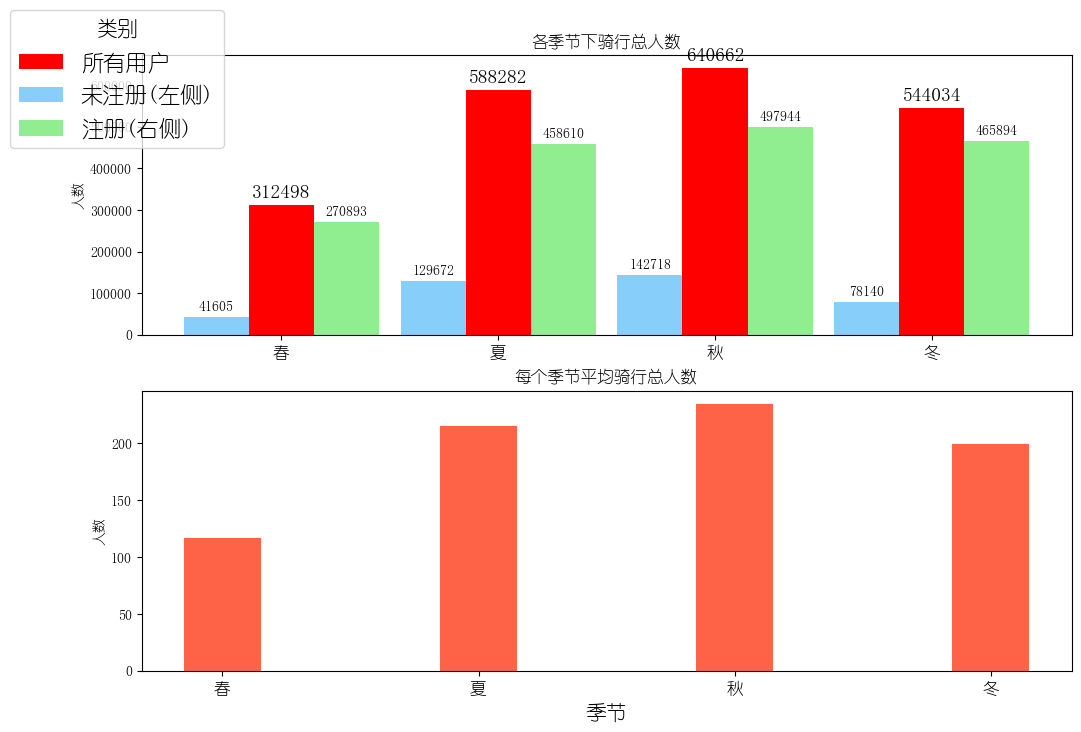

In [73]:
#   季节的影响
average_season_data = pd.DataFrame(columns=['season', 'num', 'count', 'casual', 'registered'])
season = ['春', '夏', '秋', '冬']
for i in range(0, 4):
    average_season_data.loc[i] = [i, 0, 0, 0, 0]
for i in range(0, len(data)):
    average_season_data.loc[data['season'].loc[i] - 1] = [data['season'].loc[i] - 1, average_season_data['num'].loc[data['season'].loc[i] - 1] +
                                                          1,data['count'][i] + average_season_data['count'].loc[data['season'].loc[i] - 1],
                                                          data['casual'][i] + average_season_data['casual'].loc[data['season'].loc[i] - 1],
                                                          data['registered'][i] + average_season_data['registered'].loc[
                                                              data['season'].loc[i] - 1]]


fig = plt.figure(figsize=(12, 8))
# 创建一个子图，然后在子图上操作
ax1 = fig.add_subplot(2, 1, 1)
customers_index = np.arange(len(season))
width = 0.3
rects1 = ax1.bar(customers_index, average_season_data['count'], width=width, align='center', color='red',
                 label='所有用户')
rects2 = ax1.bar(customers_index - width, average_season_data['casual'], width=width, align='center', color='lightskyblue',
                 label='未注册(左侧)')
rects3 = ax1.bar(customers_index + width, average_season_data['registered'], width=width, align='center', color='lightgreen',
                 label='注册(右侧)')
ax1.bar_label(rects1, padding=3, **{'fontsize': 14})
ax1.bar_label(rects2, padding=3)
ax1.bar_label(rects3, padding=3)
ax1.xaxis.set_ticks_position('bottom')
# 刻度线只显示在 y 轴 右侧。
ax1.yaxis.set_ticks_position('left')
# 显示label 里面设置的图例
ax1.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(1.01, 0.7))
# 设置 X轴刻度
ax1.set_xticks(customers_index)
# 设置 X轴刻度标签
ax1.set_xticklabels(season)
# 设置 X 轴标签，字体大小
ax1.xaxis.set_tick_params(labelsize=12)
# 设置 X轴标签
# Y 轴
ax1.yaxis.set_tick_params(which="both", labelsize=10)
ax1.set_ylabel('人数')
ax1.set_title('各季节下骑行总人数')
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(customers_index, average_season_data['count'] / average_season_data['num'], width=width, align='center',
        color='tomato',label='all')

# 设置 X轴刻度
ax2.set_xticks(customers_index)
# 设置 X轴刻度标签
ax2.set_xticklabels(season)
ax2.xaxis.set_tick_params(labelsize=12)
# 设置 X轴标签
ax2.set_xlabel('季节', fontsize=15)
# Y 轴
ax2.yaxis.set_tick_params(which="both", labelsize=10)
ax2.set_ylabel('人数')
ax2.set_title('每个季节平均骑行总人数')
ax1.legend(title="类别",
           fontsize=16,
           title_fontsize=15,
           bbox_to_anchor=(0.1, 1.2))
plt.show()

# 两个图表示出了各不同季节下的骑行总人数和每小时平均骑行人数

## 通过图像可以看出，春季人数最少，夏秋冬三季接近，但夏秋两季还是最多的

## 并且骑行总人数和平均小时骑行人数的情况一样

# 分析：

## 春冬季气温较低，夏秋气温较高，而且节假日也集中在春东两季，并且秋天凉爽还有风，秋季骑行人数最多也验证了前面的结论。

## 
---
-----

# ------------------------------------------------总结---------------------------------------------------

# 一：注册与非注册
## 注册用户大多都是上班族、学生党，在工作日的使用率相对更高；

## 非注册用户使用大多集中在周末和假期的白天。

# 二: 季节
## 夏、秋季是使用单车的高峰期；

## 春天使用人数较少。

# 三：天气

## '晴天，多云'骑行总人数最多；

## '雾天，阴天'较多；
## '小雪，小雨'较少；
## '大雨，大雪，大雾'因为特殊原因也有较多人骑行。¶

# 四：人的感觉

## 人的感觉的影响因素为温度、风速 、湿度等；

## 感觉越好使用人数越多；湿度在20-40、风速在0-20时最适宜骑行；温度在38度内与数量几乎成正比，高于38度使用人数会减少。

# 五：时间

## 早晚高峰（早八点左右，晚八点左右）骑行人数最多；



## 非高峰时间 非注册者骑行人数会增多。

---
# ------------------------------------------------谢谢---------------------------------------------------